In [9]:
# 纯 Python 方法实现的随机漫步

import random

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

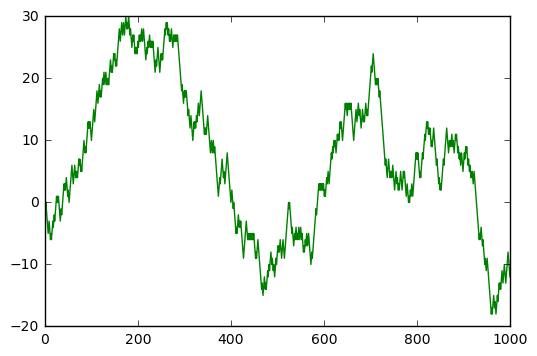

In [10]:
import matplotlib.pyplot as plt
a_walk = plt.plot(walk)
plt.show()

In [13]:
# NumPy 随机数方法实现随机漫步

import numpy as np


nsteps = 1000
np_draws = np.random.randint(0, 2, size=nsteps)  # 生成随机数
np_steps = np.where(np_draws > 0, 1, -1)  # 根据随机结果分配值
np_walk = np_steps.cumsum()  # 累计和

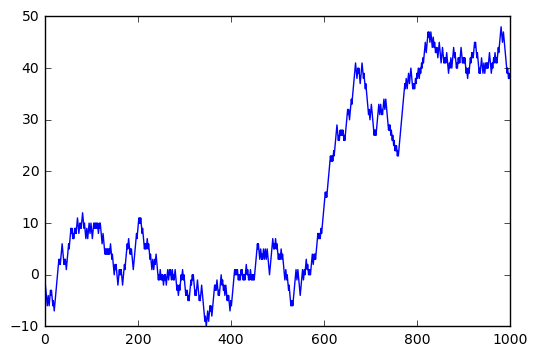

In [14]:
b_walk = plt.plot(np_walk)
plt.show()

In [15]:
np_walk.min()

-10

In [16]:
np_walk.max()


48

In [17]:
# 首次穿越时间
# 此处的 argmax 并不高效, 因为它对数组进行了完全扫描
(np.abs(np_walk) >= 10).argmax()  # 第一次大于 10 的索引


69

In [25]:
# 一次性生成多组随机漫步数据

nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)


In [26]:
walks

array([[ -1,   0,  -1, ..., -16, -17, -16],
       [  1,   2,   3, ...,   8,   9,  10],
       [ -1,  -2,  -3, ...,  30,  29,  30],
       ..., 
       [  1,   2,   3, ..., -42, -43, -42],
       [ -1,  -2,  -3, ...,   4,   5,   6],
       [ -1,   0,  -1, ...,   2,   3,   4]])

In [27]:
walks.max()


114

In [28]:
walks.min()

-117

In [29]:
hist30 = (np.abs(walks) >= 30).any(1)  # 漫步距离达到 30 的

In [30]:
hist30

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

In [34]:
hist30.sum()  # 漫步距离达到 30 的总数

3438

In [33]:
# 在轴 1 上获取穿越时间

crossing_times = (np.abs(walks[hist30]) >= 30).argmax(1)

crossing_times.mean()

507.94822571262364